#  Business Problem Understanding

TokoHijau a leading e-commerce company, faces high customer churn rates, impacting revenue and growth. To mitigate this, understanding churn drivers and predicting at-risk customers is crucial. With targeted retention strategies, TokoHijau can boost loyalty and safeguard its revenue.

# Problem Statement

E-commerce must predict customer churn to reduce revenue loss by targeting the right customers with effective promotions. This ensures better service, retains customers, and minimizes potential losses.

# Goals

- Develop predictive models that can identify customers who are likely to churn before they actually leave the service.

- Optimize promotional strategies by ensuring that promotions are only given to customers who have a high probability of using them.

# Metric Evaluation 

- True Positive: The model predicts that customers will churn and the result is churn
- False Positive: The model predicts that customers will churn, but in reality they do not churn
- False Negative: The model predicts that customers will not churn, but in reality they do churn
- True Negative: The model predicts that customers will not churn and the result is not churn

Here is an analysis of the prediction errors :

False Positive:
- Promotions are given to customers who do not actually need promotions. This can result in decreased profits from the product.

False Negative:
- Customers who should get promotions or special attention do not receive them, and this can have a negative impact because they may actually leave the service which means no profit from the customer.

# Data set Understanding

This dataset presents information that can be used to analyze customer churn behavior and identify factors that influence their decision to unsubscribe. Here is a summary of the information in this dataset:

1. Customer Demographic Information (Dependents): This data provides insight into the customer's personality, which may affect the stability of their membership in the service. For example, the features `Warehouse To Home` and `Marital Status`
2. Customer Application Usage: The dataset includes information about how customers use the application, such as: `Tenure`, `Number of Device Registered`, `Prefer Order Cat`, `Number Of Address`, `Day Since Last Order`, and `Cashbak Amount`.
3. Customer Satisfaction: This data includes customer ratings `Satisfaction Score` and complaints from customers `Complain`.
4. Customer Churn Status: The critical column in the dataset is the `Churn` column, which indicates whether a customer has churn from the application. Analysis of this column will help in understanding the customer churn pattern and identifying factors related to their decision to leave the service.



| Feature                   | Description                                                   |
|---------------------------|---------------------------------------------------------------|
| **Tenure**                | Tenure of a customer in the company.                          |
| **WarehouseToHome**       | Distance between the warehouse to the customer’s home.        |
| **NumberOfDeviceRegistered** | Total number of devices registered on a particular customer. |
| **PreferedOrderCat**      | Preferred order category of a customer in the last month.     |
| **SatisfactionScore**     | Satisfactory score of a customer on service.                  |
| **MaritalStatus**         | Marital status of a customer.                                 |
| **NumberOfAddress**       | Total number of addresses added by a particular customer.     |
| **Complaint**             | Any complaint raised in the last month.                       |
| **DaySinceLastOrder**     | Days since the last order by the customer.                    |
| **CashbackAmount**        | Average cashback in the last month.                           |
| **Churn**                 | Churn flag.                                                   |


# Import Library and Load Dataset

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pandas as pd



In [14]:

df = pd.read_csv('data_ecommerce_customer_churn.csv')
df



,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


We have 3941 row and 11 columns

# Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


we drop all duplicated data. it because we dont have ID so all the duplicate data is duplicate

In [16]:
# Drop duplicates
df = df.drop_duplicates()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3110 non-null   float64
 1   WarehouseToHome           3135 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3089 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.6+ KB


before = 3941 row 11 column
after = 3270 row 11 column

In [18]:
# Replace value in PreferedOrderCat
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat'] = 'Mobile Phone'


In [19]:
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: count, dtype: int64

In [20]:
# Handle missing values using median for numerical columns
numerical_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# # Handle missing values using median for numerical columns
# numerical_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
# imputer = SimpleImputer(strategy='median')

# # Explicitly using .loc to avoid SettingWithCopyWarning
# df.loc[:, numerical_cols] = imputer.fit_transform(df[numerical_cols])


C:\Users\finePC\AppData\Local\Temp\ipykernel_2280\3200463781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


#### Seperate features and target

In [21]:
# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']



#### Encode

In [22]:
# Categorical
categorical_cols = ['PreferedOrderCat', 'MaritalStatus']

# Numerical
numerical_cols = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 
                  'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount']

# Column transformer for handling encode categorical col
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'  # execpt categorical we kept
)

X = column_transformer.fit_transform(X)  # Transformasi fitur

In [23]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3933,25.0,15.0,5,Fashion,4,Married,7,0,8.0,249.90,0
3935,26.0,7.0,4,Grocery,1,Married,4,0,9.0,295.99,0
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0


# Imbalance

In [25]:
df['Churn'].value_counts()

Churn
0    2736
1     534
Name: count, dtype: int64

the data is imbalance so we use SMOTE 

In [26]:
# Handle Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



# Train Test Split

In [27]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)



#### Build XGboost Model

In [28]:
# Build XGBoost Model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)




c:\Users\finePC\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [29]:
# Make Predictions and Evaluate
y_pred = xgb.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results in a readable format
print("Model Evaluation Metrics:")
print("-" * 30)
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nClassification Report:")
print("-" * 30)
print(classification_rep)


Model Evaluation Metrics:
------------------------------
Accuracy:  0.9543
Precision: 0.9510
Recall:    0.9580
F1 Score:  0.9545

Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       548
           1       0.95      0.96      0.95       547

    accuracy                           0.95      1095
   macro avg       0.95      0.95      0.95      1095
weighted avg       0.95      0.95      0.95      1095



In [30]:
# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


# Features Importance

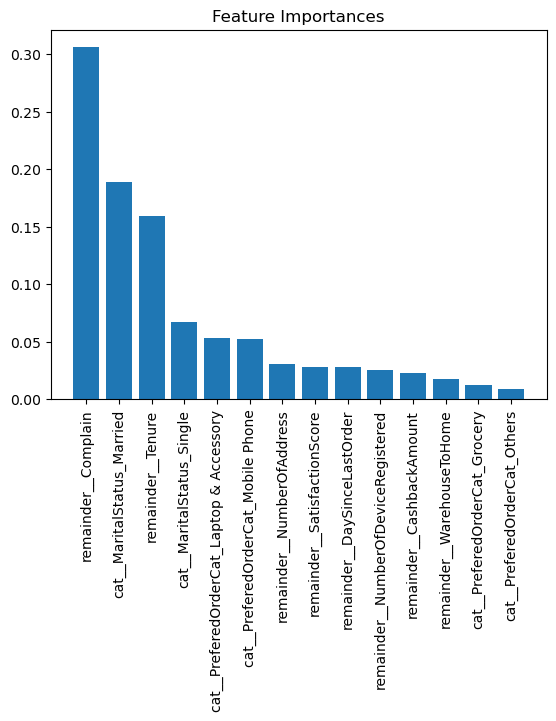

In [32]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = column_transformer.get_feature_names_out()
importance = xgb.feature_importances_

sorted_idx = np.argsort(importance)[::-1]
plt.bar(range(len(importance)), importance[sorted_idx])
plt.xticks(range(len(importance)), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importances")
plt.show()


From the data above, it can be seen which factors influence the potential for customer churn and the machine learning model. The most important feature is complaint, then marital status, and tenure. Analysis can be improved by performing feature selection or a combination of influential features to reduce model complexity and compared to the current best model. 

In addition, these factors can also be an insight for business, where companies must receive feedback from customers who complain and follow up on these complaints, both from e-commerce platforms and marketplaces registered on the platform. In addition, companies can increase customer retention by providing attractive ongoing promotions, such as if there is a subscription.

# Cross Validation

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      2736
           1       0.95      0.88      0.91      2736

    accuracy                           0.92      5472
   macro avg       0.92      0.92      0.92      5472
weighted avg       0.92      0.92      0.92      5472

Confusion Matrix:
 [[2610  126]
 [ 337 2399]]


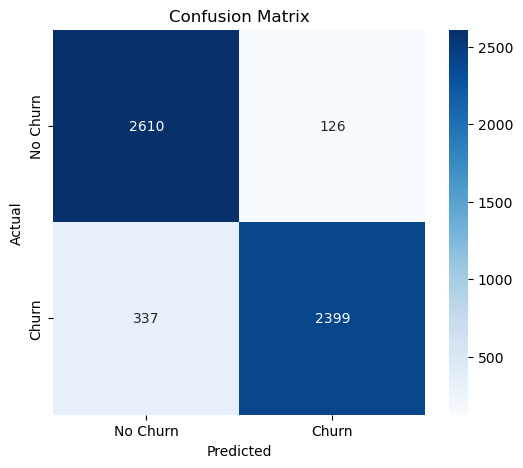

Precision: 0.95009900990099
Recall: 0.876827485380117
F1 Score: 0.9119939175061775


In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-validation predictions (instead of just scores, we get actual predictions)
y_pred = cross_val_predict(xgb, X_resampled, y_resampled, cv=3)

# Calculate confusion matrix
cm = confusion_matrix(y_resampled, y_pred)

# Calculate precision, recall, f1 score
precision = precision_score(y_resampled, y_pred)
recall = recall_score(y_resampled, y_pred)
f1 = f1_score(y_resampled, y_pred)

# Print Classification Report
print("Classification Report:\n", classification_report(y_resampled, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Precision, Recall, and F1 Score
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [103]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(
#     xgb, X_resampled, y_resampled, cv=3, scoring='f1'
# )
# print(f"Cross-Validation F1 Scores: {scores}")
# print(f"Mean F1 Score: {scores.mean()}")


Cross-Validation F1 Scores: [0.76933333 0.96559026 0.97222222]
Mean F1 Score: 0.9023819383173538


Here are some recommendations that can be given regarding the business and model side: 

* Business:
    - Pay attention to complaints given by customers, both in terms of ease of use of the e-commerce platform, increasing product variations by looking for partners, optimizing live chat between customers-buyers and customers-support centers, monitoring and providing training to registered marketplaces so that they provide satisfactory service and products.
    - Offering shipping cost reductions to potential customer churn who have a long distance between the warehouse and their home
    - Using a machine learning model that has been created as a solution to determine the right marketing strategy

* Model:
    - When data retrieval, data is expected to have a customer ID column to ensure there is no duplicate data, and to ensure that the data obtained does not have missing values
    - There is a column with other features that are directly related to the services provided by the e-commerce company and customer transactions, such as how long the product is delivered, the timeliness of delivery, the customer service column is helpful or not, and so on
    - The model can be improved by tuning hyperparameters with values ​​that have been obtained as references, or adding other parameters
    - Increase recall value by tuning the ROC-AUC threshold
    - Sort features according to feature importances and conduct trials of influential feature combinations to reduce model complexity

# Save Model

In [104]:
import pickle

# Save the trained model
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

# Save the column transformer for feature transformation
with open('column_transformer.pkl', 'wb') as f:
    pickle.dump(column_transformer, f)


In [105]:
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# Test prediction

In [106]:
# New data for prediction
new_data = pd.DataFrame({
    'Tenure': [12],
    'WarehouseToHome': [5],
    'NumberOfDeviceRegistered': [3],
    'PreferedOrderCat': ['Mobile Phone'],
    'SatisfactionScore': [3],
    'MaritalStatus': ['Married'],
    'NumberOfAddress': [2],
    'Complain': [0],
    'DaySinceLastOrder': [20],
    'CashbackAmount': [500]
})

# Transform and predict
new_data_transformed = column_transformer.transform(new_data)
prediction = loaded_model.predict(new_data_transformed)

# Output the prediction
print(f"Churn Prediction: {'Churn' if prediction[0] == 1 else 'Not Churn'}")


Churn Prediction: Not Churn
